In [66]:
import typing
import numpy as np
import matplotlib.pyplot as plt

def trapezoidal_rule(func, a, b, n=100):
    x = np.linspace(a, b, n+1)
    y = func(x)
    h = (b - a) / n
    return (h/2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])


def integrand_f(phi: typing.Callable, i):
    return lambda x: x * phi(x, i)

def build_matrix_and_vector(n, phi, phi_prime, integration_n):
    A = np.zeros((n, n))
    f = np.zeros(n)
    for i in range(1, n+1):
        for j in range(1, n+1):
            aij_integrand = lambda x: phi_prime(x, i)*phi_prime(x, j) + phi(x, i)*phi(x, j)
            A[i-1, j-1] = trapezoidal_rule(aij_integrand, 0, 1, n=integration_n)
        fi_integrand = lambda x: x*phi(x, i)
        f[i-1] = trapezoidal_rule(fi_integrand, 0, 1, n=integration_n)
    return A, f

def solve_galerkin(n, phi: typing.Callable, phi_prime: typing.Callable, integration_n = 100):
    A, f = build_matrix_and_vector(n, phi, phi_prime, integration_n)
    w = np.linalg.solve(A, f)
    return A, f, w

def u_h(x, w, phi):
    n = len(w)
    return sum(w[i] * phi(x, i+1) for i in range(n))


In [67]:
def phi_xi(x, i):
    return x**i * (x - 1)

def phi_sin(x, i):
    return np.sin(i * np.pi * x)

def phi_xi_prime(x, i):
    return i * x**(i-1) * (x - 1) + x**i

def phi_sin_prime(x, i):
    return i * np.pi * np.cos(i * np.pi * x)

def formatar_numero(num):
    return "{:.1e}".format(num)

def matriz_para_latex(matriz):
    linhas = []
    for linha in matriz:
        elementos = " & ".join(formatar_numero(x) for x in linha)
        linhas.append(elementos)
    corpo = " \\\\\n".join(linhas)
    latex = "\\begin{bmatrix}\n" + corpo + "\n\\end{bmatrix}"
    return latex

\begin{bmatrix}
5.4e+00 & 1.1e-15 & -2.1e-15 & 2.1e-15 & 0.0e+00 & -8.5e-15 \\
1.1e-15 & 2.0e+01 & -7.1e-16 & 1.1e-14 & -7.1e-15 & -2.3e-14 \\
-2.1e-15 & -7.1e-16 & 4.5e+01 & -1.4e-14 & -1.1e-14 & 2.3e-14 \\
2.1e-15 & 1.1e-14 & -1.4e-14 & 7.9e+01 & 5.7e-15 & 1.2e+02 \\
0.0e+00 & -7.1e-15 & -1.1e-14 & 5.7e-15 & 2.5e+02 & -2.3e-14 \\
-8.5e-15 & -2.3e-14 & 2.3e-14 & 1.2e+02 & -2.3e-14 & 1.8e+02
\end{bmatrix}


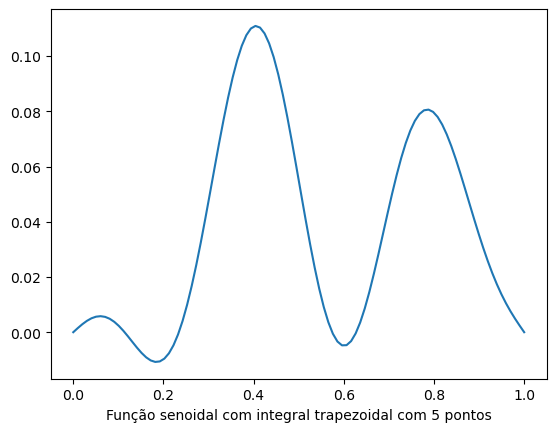

In [68]:
# Parameters
n = 6

# Solve using Galerkin method
A, f, w = solve_galerkin(n, phi_sin, phi_sin_prime, integration_n = 5)

# Evaluate the solution u_h at some points
x_points = np.linspace(0, 1, 100)
u_h_values = [u_h(x, w, phi_sin) for x in x_points]

plt.plot(x_points, u_h_values)
plt.xlabel("Função senoidal com integral trapezoidal com 5 pontos", fontsize = 10)

plt.savefig("images/exercicio6_seno.png")

print(matriz_para_latex(A))

\begin{bmatrix}
3.7e-01 & 1.8e-01 & 1.1e-01 & 7.3e-02 & 5.2e-02 & 3.9e-02 & 3.0e-02 & 2.4e-02 & 2.0e-02 & 1.6e-02 \\
1.8e-01 & 1.4e-01 & 1.1e-01 & 8.0e-02 & 6.2e-02 & 5.0e-02 & 4.1e-02 & 3.4e-02 & 2.8e-02 & 2.4e-02 \\
1.1e-01 & 1.1e-01 & 9.0e-02 & 7.4e-02 & 6.2e-02 & 5.2e-02 & 4.4e-02 & 3.7e-02 & 3.2e-02 & 2.8e-02 \\
7.3e-02 & 8.0e-02 & 7.4e-02 & 6.6e-02 & 5.7e-02 & 5.0e-02 & 4.4e-02 & 3.8e-02 & 3.4e-02 & 3.0e-02 \\
5.2e-02 & 6.2e-02 & 6.2e-02 & 5.7e-02 & 5.2e-02 & 4.7e-02 & 4.2e-02 & 3.7e-02 & 3.4e-02 & 3.0e-02 \\
3.9e-02 & 5.0e-02 & 5.2e-02 & 5.0e-02 & 4.7e-02 & 4.3e-02 & 3.9e-02 & 3.6e-02 & 3.3e-02 & 3.0e-02 \\
3.0e-02 & 4.1e-02 & 4.4e-02 & 4.4e-02 & 4.2e-02 & 3.9e-02 & 3.7e-02 & 3.4e-02 & 3.1e-02 & 2.9e-02 \\
2.4e-02 & 3.4e-02 & 3.7e-02 & 3.8e-02 & 3.7e-02 & 3.6e-02 & 3.4e-02 & 3.2e-02 & 3.0e-02 & 2.8e-02 \\
2.0e-02 & 2.8e-02 & 3.2e-02 & 3.4e-02 & 3.4e-02 & 3.3e-02 & 3.1e-02 & 3.0e-02 & 2.8e-02 & 2.7e-02 \\
1.6e-02 & 2.4e-02 & 2.8e-02 & 3.0e-02 & 3.0e-02 & 3.0e-02 & 2.9e-02 & 2.8e-

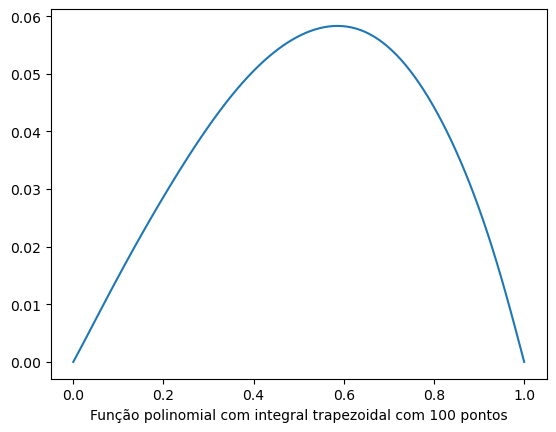

In [69]:
# Parameters
n = 10

# Solve using Galerkin method
A, f, w = solve_galerkin(n, phi_xi, phi_xi_prime, integration_n = 100)

# Evaluate the solution u_h at some points
x_points = np.linspace(0, 1, 100)
u_h_values = [u_h(x, w, phi_xi) for x in x_points]

plt.plot(x_points, u_h_values)
plt.xlabel("Função polinomial com integral trapezoidal com 100 pontos", fontsize = 10)

plt.savefig("images/exercicio6_polinomio.png")

print(matriz_para_latex(A))